In [1]:
from scipy.stats import chi2
from scipy.stats import gamma
from scipy.stats import norm
from scipy.stats import skewnorm
from scipy.stats import lognorm
from scipy.stats import halfnorm
from scipy.stats import crystalball
from scipy.stats import laplace_asymmetric
from scipy.stats import halfcauchy

In [2]:
def laplace_asymmetricfit(args, x):
#     df = args
    Amp, kappa, loc, scale, b = args
#     print(df)
    rv = laplace_asymmetric(kappa = kappa, loc = loc, scale = scale)
    return Amp*rv.pdf(x) + b

In [3]:
def lstsq_laplace_asymmetricfit(args, x, y):
#     print(args, x, y)
    return laplace_asymmetricfit(args, x) - y

In [4]:
def skewnormfit(args, x):
#     df = args
    Amp, a, loc, scale, b, c, d = args
#     print(df)
    rv = skewnorm(a = a, loc = loc, scale = scale)
    return Amp*rv.pdf(x) + b + c*x + d*x*x

In [5]:
def lstsq_skewnormfit(args, x, y):
#     print(args, x, y)
    return skewnormfit(args, x) - y

In [6]:
def skewnormfit2(args, x):
#     df = args
    a, loc, scale, b, c, d = args
#     print(df)
    rv = skewnorm(a = a, loc = loc, scale = scale)
    return Amp*rv.pdf(x) + b + c*x + d*x*x

In [7]:
def lstsq_skewnormfit2(args, x, y):
#     print(args, x, y)
    return skewnormfit2(args, x) - y

In [8]:
def lognormfit(args, x):
#     df = args
    Amp, s, loc, scale, b, c = args
#     print(df)
    rv = lognorm(s = s, loc = loc, scale = scale)
    return Amp*rv.pdf(x) + b + c*x

In [9]:
def lstsq_lognormfit(args, x, y):
#     print(args, x, y)
    return lognormfit(args, x) - y

In [10]:
def normfit(args, x):
#     df = args
    Amp, loc, scale, a, b, c = args
#     print(df)
    rv = norm(loc = loc, scale = scale)
    return Amp*rv.pdf(x) + a + b*x +c*x*x

In [11]:
def lstsq_normfit(args, x, y):
#     print(args, x, y)
    return normfit(args, x) - y

In [12]:
def normfit2(args, x):
#     df = args
    Amp, loc, scale, a, b, c, d = args
#     print(df)
    rv = norm(loc = loc, scale = scale)
    return Amp*rv.pdf(x) + a + b*x + c*x*x + d*x*x*x

In [13]:
def lstsq_normfit2(args, x, y):
#     print(args, x, y)
    return normfit2(args, x) - y

In [14]:
def halfnormfit(args, x):
#     df = args
    Amp, scale, a, b, c = args
#     print(df)
    rv = halfnorm(scale = scale)
    return Amp*rv.pdf(x) + a + b*x + c*x*x

In [15]:
def lstsq_halfnormfit(args, x, y):
#     print(args, x, y)
    return halfnormfit(args, x) - y

In [16]:
def halfnormfit2(args, x):
#     df = args
    Amp, scale, a, b = args
#     print(df)
    rv = halfnorm(scale = scale)
    return Amp*rv.pdf(x) + a + b*x

In [17]:
def lstsq_halfnormfit2(args, x, y):
#     print(args, x, y)
    return halfnormfit2(args, x) - y

In [18]:
def halfcauchyfit(args, x):
#     df = args
    Amp, scale, a, b, c = args
#     print(df)
    rv = halfcauchy(scale = scale)
    return Amp*rv.pdf(x) + a + b*x + c*x*x

In [19]:
def lstsq_halfcauchyfit(args, x, y):
#     print(args, x, y)
    return halfcauchyfit(args, x) - y

In [20]:
def probFit(dist, bins, fit, res_lsq, hist = None, unchist = None):
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    if hist is None:
        hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    if unchist is None:
        unchist = np.sqrt(dist)/np.sum(dist)/np.diff(bincenters)[0]
    chi2fit = np.sum((hist - fit)**2/unchist**2)
    dof = len(hist) - len(res_lsq.x)
    pvalue = 1-chi2.cdf(chi2fit, dof)
    return pvalue, chi2fit, dof

In [21]:
from utils.epg import *
import matplotlib.pyplot as plt
from copy import copy
cmap = copy(plt.cm.get_cmap("jet"))
from scipy.optimize import least_squares

In [22]:
degree = r"${}^{\circ}$"
GeV = "GeV"
GeV2 = "GeV"+r"${}^{2}$"
GeVc = "GeV/c"
GeVc2 = "(GeV/c)"+r"${}^{2}$"

In [23]:
import matplotlib
# initial settings
pgf_with_latex = {
		"pgf.texsystem": "pdflatex",
		"text.usetex": True,            # use LaTeX to write all text
		"font.family": "sans-serif",         
		"font.sans-serif": "Helvetica",
		"font.size": 25,				# default font size
		"axes.labelsize": 24,			# x and y label size
		"axes.titlesize": 24,           # subfigure title size, i.e. title size when one figure
		"legend.fontsize": 22,			# legend size
		"xtick.labelsize": 23,			# x axis tick label size
		"ytick.labelsize": 23,			# y axis tick label 
		"figure.titlesize": 25,         # Figure title size, useful when you have multiple plots in one canvas.
		"pgf.preamble": r"\usepackage{xcolor}",     # xcolor for colours
		"figure.autolayout": True
}
matplotlib.rcParams.update(pgf_with_latex)

def nphistmean(hist, bins):
    s=0
    for i in range(len(hist)):
        s += hist[i] * ((bins[i] + bins[i+1]) / 2) 
    mean = s / np.sum(hist)
    return mean

In [24]:
def extendedBins(bins, left, right):
    binwidth = np.diff(bins)[0]
    leftbins = bins[0] - (np.linspace(1, left+1, left+1)*binwidth)[::-1]
    rightbins = np.linspace(1, right+1, right +1)*binwidth + bins[-1]
    return np.array([*leftbins, *bins, *rightbins])

## Inbending DVCS

In [25]:
parent_epg = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v4.2/outb/epg/"
epg_4398 = pd.read_pickle(parent_epg + "4398" + "_epg.pkl")
epg_4243 = pd.read_pickle(parent_epg + "4243" + "_epg.pkl")

In [26]:
dvcsSimOutb = epg_4398
bkgSimOutb = epg_4243

In [27]:
dvcsSimOutb = dvcsSimOutb.loc[dvcsSimOutb.Ge>2]
bkgSimOutb = bkgSimOutb.loc[bkgSimOutb.Ge>2]

## CD cuts

In [28]:
dvcsSimOutbCD = dvcsSimOutb.loc[dvcsSimOutb.config == 2]
bkgSimOutbCD = bkgSimOutb.loc[bkgSimOutb.config == 2]

In [29]:
contInbCDFT = .0040597266707579184
contInbCD = 0.13554782386935704
contInbFD = 0.3804839519140771
contOutbCDFT = 0.005652963491001403
contOutbCD = 0.21805902894791315
contOutbFD = 0.5115950737954632

In [30]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        simDist_dvcs, bins = np.histogram(dvcsSimOutbCD.MM2_ep, bins = np.linspace(-0.4, 0.4, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimOutbCD.MM2_ep, bins = np.linspace(-0.4, 0.4, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contOutbCD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contOutbCD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contOutbCD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contOutbCD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
        params = [1, 0, 0.3, 0, 0, 0]
    else:
        simDist_dvcs, bins = np.histogram(dvcsSimOutbCD.MM2_ep, bins = np.linspace(lb, ub, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimOutbCD.MM2_ep, bins = np.linspace(lb, ub, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contOutbCD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contOutbCD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contOutbCD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contOutbCD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    res_lsq = least_squares(lstsq_normfit, params, args=(bincenters, simDist))
    params = res_lsq.x
    Amp, loc, scale, a, b, c = params
    lb = norm.ppf(0.02, loc = loc, scale = scale)
    ub = norm.ppf(0.98, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(simDist, bins,  normfit(res_lsq.x, bincenters), res_lsq, hist = simDist, unchist = uncDist)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = loc - 4*scale
        ub_opt = loc + 4*scale
        dist_opt = simDist
        unc_opt = uncDist
        print(params_opt, lb, ub, pvalue)

0.0 5838.505360382149 94
0.00043145020254542477 146.5068701767695 94
[ 2.74201629e-01  1.62203903e-02  6.81761434e-02  2.15517423e+00
  2.02277502e+00 -2.42697447e+01] -0.12379628997227095 0.15623707059783065 0.00043145020254542477
0.2927318385913116 100.98116608873833 94
[ 3.74837023e-01  1.46354568e-02  7.04898837e-02  2.40587600e+00
  2.50293186e+00 -2.22225748e+01] -0.1301330649758377 0.15940397862413105 0.2927318385913116
0.013686138090946876 126.78507847448425 94
0.019665777070541957 124.3699379274212 94
0.008608688195462899 129.74538138453988 94
0.014570660776536348 126.37455958317994 94
0.030595805103411866 121.28366205706905 94
0.0057932208877991 132.17604726434234 94
0.20207643313320423 105.19350112540089 94


In [31]:
len(dvcsSimOutbCD)

1938483

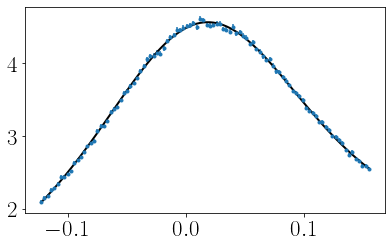

In [32]:
plt.errorbar(bincenters_opt, dist_opt, yerr = unc_opt, linestyle = '', marker = '.')
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.show()

In [33]:
print(lb_opt, ub_opt)

-0.2673240778600563 0.29659499150834967


In [34]:
dvcsSimOutbCD = dvcsSimOutbCD.loc[(dvcsSimOutbCD.MM2_ep<0.297)&(dvcsSimOutbCD.MM2_ep>-0.267)]
bkgSimOutbCD = bkgSimOutbCD.loc[(bkgSimOutbCD.MM2_ep<0.297)&(bkgSimOutbCD.MM2_ep>-0.267)]

In [35]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        simDist_dvcs, bins = np.histogram(dvcsSimOutbCD.MM2_eg, bins = np.linspace(-0.5, 2.5, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimOutbCD.MM2_eg, bins = np.linspace(-0.5, 2.5, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contOutbCD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contOutbCD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contOutbCD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contOutbCD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
        params = [1, 0.908, 0.244, -0.471, 0.526, 0]
    else:
        simDist_dvcs, bins = np.histogram(dvcsSimOutbCD.MM2_eg, bins = np.linspace(lb, ub, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimOutbCD.MM2_eg, bins = np.linspace(lb, ub, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contOutbCD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contOutbCD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contOutbCD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contOutbCD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    res_lsq = least_squares(lstsq_normfit, params, args=(bincenters, simDist))
    params = res_lsq.x
    Amp, loc, scale, a, b, c = params
    lb = norm.ppf(0.02, loc = loc, scale = scale)
    ub = norm.ppf(0.98, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(simDist, bins,  normfit(res_lsq.x, bincenters), res_lsq, hist = simDist, unchist = uncDist)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = loc - 4*scale
        ub_opt = loc + 4*scale
        dist_opt = simDist
        unc_opt = uncDist
        print(params_opt, lb, ub, pvalue)

0.0 20920.341996323088 94
4.0190073491430667e-14 235.4467924462135 94
[ 0.3494032   0.97518676  0.30785021 -0.01475166  0.85994758 -0.35895986] 0.34293972297019026 1.6074338062527564 4.0190073491430667e-14
0.20219372992833196 105.18734694076144 94
[ 0.39876371  0.9709851   0.30973745 -0.03772139  0.97340016 -0.39018519] 0.33486214211652376 1.6071080479462136 0.20219372992833196
0.4683325035498511 94.42340928196968 94
[ 0.4096925   0.97109984  0.31232588 -0.03023019  0.93283125 -0.36943158] 0.32966090818255045 1.612538768040947 0.4683325035498511
0.21672093930403225 104.4426559089964 94
0.6269400463616914 88.98296074919217 94
[ 0.40597898  0.97103765  0.31141181 -0.03346147  0.94931023 -0.37752752] 0.3314759894324112 1.6105993006365136 0.6269400463616914
0.5745506288476829 90.7910045630854 94
0.7722986101869674 83.50973192842913 94
[ 0.40924088  0.97105508  0.31212735 -0.03131343  0.93845314 -0.37197607] 0.33002387896649943 1.612086284676815 0.7722986101869674
0.3593296080679458 98.3400

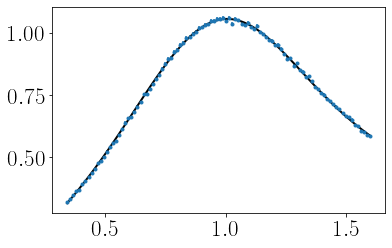

In [36]:
plt.errorbar(bincenters_opt, dist_opt, yerr = unc_opt, linestyle = '', marker = '.')
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.show()

In [37]:
print(lb_opt, ub_opt)

-0.2774543139212695 2.219564477564584


In [38]:
dvcsSimOutbCD = dvcsSimOutbCD.loc[(dvcsSimOutbCD.MM2_eg<2.220)&(dvcsSimOutbCD.MM2_eg>-0.277)]
bkgSimOutbCD = bkgSimOutbCD.loc[(bkgSimOutbCD.MM2_eg<2.220)&(bkgSimOutbCD.MM2_eg>-0.277)]

In [39]:
len(dvcsSimOutbCD)

1311434

In [40]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        simDist_dvcs, bins = np.histogram(dvcsSimOutbCD.ME_epg, bins = np.linspace(-0.422, 0.466, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimOutbCD.ME_epg, bins = np.linspace(-0.422, 0.466, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contOutbCD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contOutbCD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contOutbCD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contOutbCD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
        params = [1, 0.1, 0.14, -0.471, 0.526, 0]
    else:
        simDist_dvcs, bins = np.histogram(dvcsSimOutbCD.ME_epg, bins = np.linspace(lb, ub, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimOutbCD.ME_epg, bins = np.linspace(lb, ub, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contOutbCD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contOutbCD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contOutbCD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contOutbCD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    res_lsq = least_squares(lstsq_normfit, params, args=(bincenters, simDist))
    params = res_lsq.x
    Amp, loc, scale, a, b, c = params
    lb = norm.ppf(0.02, loc = loc, scale = scale)
    ub = norm.ppf(0.98, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(simDist, bins,  normfit(res_lsq.x, bincenters), res_lsq, hist = simDist, unchist = uncDist)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = loc - 4*scale
        ub_opt = loc + 4*scale
        dist_opt = simDist
        unc_opt = uncDist
        print(params_opt, lb, ub, pvalue)

0.6303922196134089 88.86223169765866 94
[0.7157856  0.0625263  0.24022297 0.36016001 0.50047354 0.06024486] -0.43083136288513757 0.5558839673147817 0.6303922196134089
3.5950523047389993e-07 178.27530885817276 94
0.05512873941114438 116.87250712529591 94
0.06519477209284352 115.53931285916033 94
0.009009537329854989 129.46055968712702 94
0.00819031973585671 130.05580101424647 94
0.02008542464375407 124.22622990071038 94
0.014690179932663527 126.32081037192715 94
0.03249194345566897 120.85016536930222 94
0.012142721973059767 127.56207534391588 94


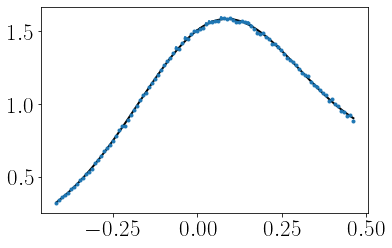

In [41]:
plt.errorbar(bincenters_opt, dist_opt, yerr = unc_opt, linestyle = '', marker = '.')
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.show()

In [42]:
print(lb_opt, ub_opt)

-0.8983655819798846 1.0234181864095289


In [43]:
dvcsSimOutbCD = dvcsSimOutbCD.loc[(dvcsSimOutbCD.ME_epg<1.023)&(dvcsSimOutbCD.ME_epg>-0.898)]
bkgSimOutbCD = bkgSimOutbCD.loc[(bkgSimOutbCD.ME_epg<1.023)&(bkgSimOutbCD.ME_epg>-0.898)]

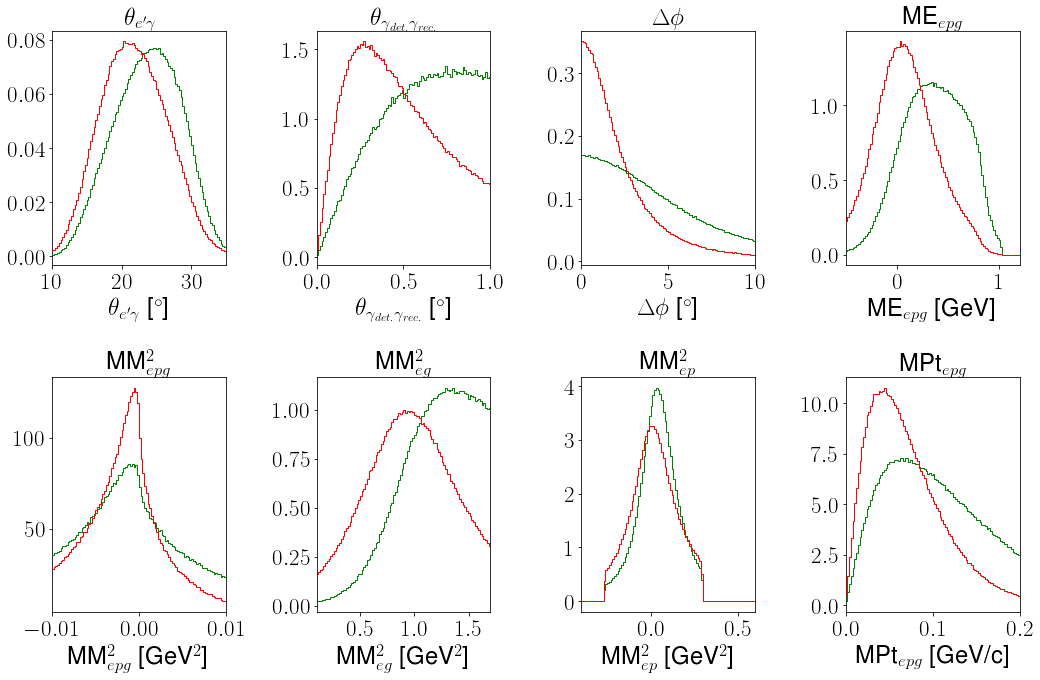

<Figure size 432x288 with 0 Axes>

In [44]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [35, 1, 10, 1.2, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(bkgSimOutbCD[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimOutbCD[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvpi0, where='mid',color='g', linewidth=1)
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

In [45]:
pvalue_opt = -0.1
for i in range(0, 10):
    if i == 0:
        simDist_dvcs, bins = np.histogram(dvcsSimOutbCD.coplanarity, bins = np.linspace(0, 10, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimOutbCD.coplanarity, bins = np.linspace(0, 10, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contOutbCD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contOutbCD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contOutbCD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contOutbCD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
        params =[1, 0.8, 0, 0, 0]
    else:
        simDist_dvcs, bins = np.histogram(dvcsSimOutbCD.coplanarity, bins = np.linspace(lb, ub, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimOutbCD.coplanarity, bins = np.linspace(lb, ub, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contOutbCD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contOutbCD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contOutbCD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contOutbCD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    res_lsq = least_squares(lstsq_halfnormfit, params, args=(bincenters, simDist))
    params = res_lsq.x
    Amp,  scale, a, b, c  = params
#     lb = min(halfnorm.ppf(0.1, loc = loc, scale = scale), -0.01)
#     ub = max(halfnorm.ppf(0.9, loc = loc, scale = scale), 0.003)
    lb = 0#min(halfnorm.ppf(0, a=a, loc = loc, scale = scale), -0.003)
    ub = 9#max(halfnorm.ppf(0.9, scale = scale), 0.002)
    pvalue, chi2fit, dof = probFit(simDist, bins,  halfnormfit(res_lsq.x, bincenters), res_lsq, hist = simDist, unchist = uncDist)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = 0#halfnorm.ppf(0, a=a, loc = loc, scale = scale)
        ub_opt = 4*scale
        dist_opt = simDist
        unc_opt = uncDist
        print(params_opt, lb, ub, pvalue)

0.0 311.7386441415406 95
[ 3.09659079e-01  1.67252365e+00  1.70297333e-01 -2.99422481e-02
  1.45347633e-03] 0 9 0.0
1.1102230246251565e-16 257.729770752298 95
[ 3.11196010e-01  1.67372375e+00  1.74555258e-01 -3.08299836e-02
  1.50794315e-03] 0 9 1.1102230246251565e-16
1.1102230246251565e-16 257.729770752298 95
1.1102230246251565e-16 257.729770752298 95
1.1102230246251565e-16 257.729770752298 95
1.1102230246251565e-16 257.729770752298 95
1.1102230246251565e-16 257.729770752298 95
1.1102230246251565e-16 257.729770752298 95
1.1102230246251565e-16 257.729770752298 95
1.1102230246251565e-16 257.729770752298 95


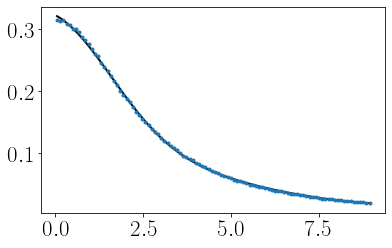

In [46]:
plt.errorbar(bincenters_opt, dist_opt, yerr = unc_opt, linestyle = '', marker = '.')
# plt.plot(bincenters_opt, skewnormfit([0.6, -2, 0, 0.003, 0, 0, 0], bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.plot(bincenters_opt, halfnormfit(params_opt, bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.show()

In [47]:
print(ub_opt)

6.694895015556247


In [48]:
dvcsSimOutbCD = dvcsSimOutbCD.loc[(dvcsSimOutbCD.coplanarity<6.695)]
bkgSimOutbCD = bkgSimOutbCD.loc[(bkgSimOutbCD.coplanarity<6.695)]

In [121]:
def lstsq_normfit3(args, x, y):
#     print(args, x, y)
    return normfit3(args, x) - y
def normfit3(args, x):
#     df = args
    loc, scale, a, b = args
#     print(df)
    rv = norm(loc = loc, scale = scale)
    return rv.pdf(x) + a + b*x

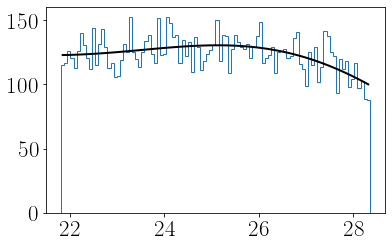

3.0 [ 2.71077828e+01  3.57228642e+00  4.37781775e-01 -1.48101754e-02] 0.2206739160994048
27.107782841190748 16.390923589248633 28.42112816706299


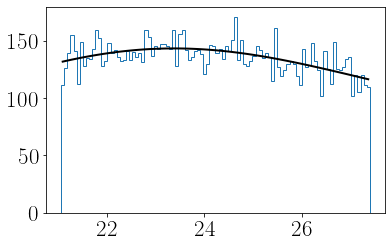

3.5 [2.30382960e+01 4.20491864e+00 3.02801797e-02 1.81329647e-03] 0.6370158438715756
23.038296016884388 10.423540104788529 23.12913655592339


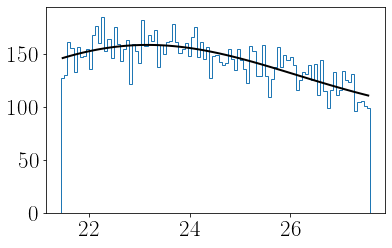

4.0 [ 2.27398547e+01  3.38740418e+00 -3.66264848e-02  4.35670606e-03] 0.051528846711523246
22.73985472709534 12.577642200307054 22.629975272750816


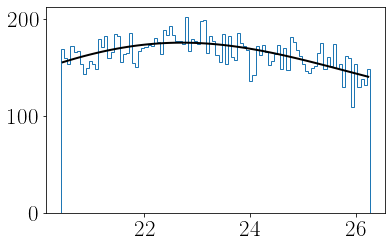

4.5 [ 2.22631208e+01  3.58653354e+00 -1.48522847e-02  3.83856701e-03] 0.3427266647253182
22.263120847155424 11.5035202369045 22.218563993068003


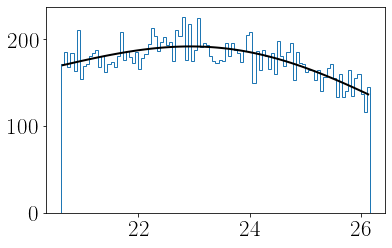

5.0 [ 2.36403099e+01  3.20487871e+00  2.65514286e-01 -8.36705683e-03] 0.1722738115071829
23.640309929710707 14.025673799664926 24.436852788716966


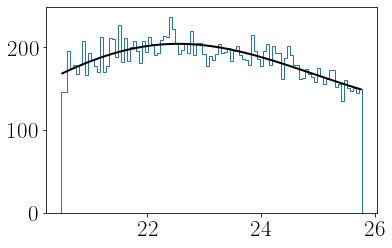

5.5 [ 2.21332279e+01  2.78579384e+00 -1.04661184e-01  7.55668913e-03] 0.7668079838042059
22.133227905153667 13.775846395317064 21.819244353196805


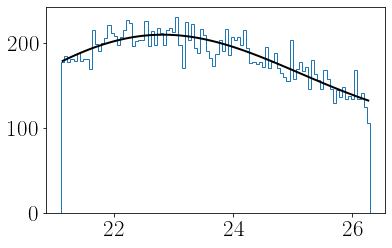

6.0 [ 2.25808534e+01  2.53744764e+00 -7.20824417e-02  5.93077470e-03] 0.563632637107107
22.580853432680335 14.968510525982774 22.364606107554806


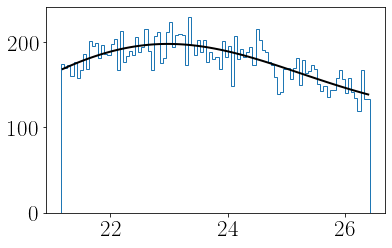

6.5 [ 2.25512251e+01  2.69791828e+00 -1.33073130e-01  8.60845252e-03] 0.044552579597229136
22.55122510879891 14.457470275466402 22.152005717637916


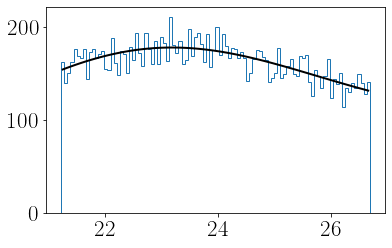

7.0 [ 2.27375054e+01  2.99729993e+00 -8.48630127e-02  6.60731988e-03] 0.2687970535879822
22.737505388471188 13.745605609002858 22.482916350505285


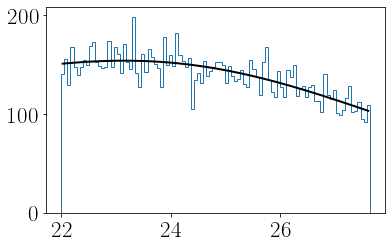

7.5 [ 2.41359545e+01  3.76482866e+00  2.58145338e-01 -7.09952817e-03] 0.02369348213948219
24.135954546276533 12.84146856878487 24.910390559804405


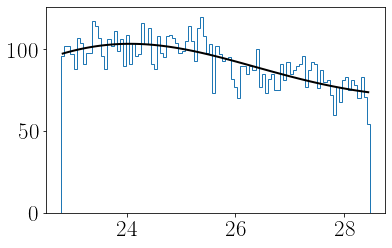

8.0 [ 2.34009431e+01  2.96731318e+00 -1.69403024e-01  9.78505549e-03] 0.6488690135036117
23.400943088827667 14.49900353801965 22.892734018211463


In [122]:
GpEdges = np.linspace(3, 8.5, 12)
GeEdges = GpEdges
GpArray = []
lbs = []
ubs = []
for i in range(len(GpEdges)-1):
    GpMin = GpEdges[i]
    GpMax = GpEdges[i+1]
    var = dvcsSimOutbCD.loc[(dvcsSimOutbCD.Gp>GpMin)&(dvcsSimOutbCD.Gp<GpMax), "coneAngle"]
    hist, bins = np.histogram(var, bins = 100)
    mu = bins[np.argmax(hist)]
    sigma = var.std()
    
    bins = np.linspace(mu-0.5*sigma, mu+1*sigma, 101)
#     if i >3:
#         bins = np.linspace(mu-sigma, mu+0.8*sigma, 101)

    
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist, bins = np.histogram(var, bins = bins)
    dist = hist/np.sum(hist)/np.diff(bins)[0]
    unchist = np.sqrt(hist)
    uncdist = unchist/np.sum(hist)/np.diff(bins)[0]
    params = [mu, sigma, 0, 0]
    res_lsq = least_squares(lstsq_normfit3, params, args=(bincenters, dist))
    plt.hist(var, bins = bins, histtype = 'step')
    
    plt.plot(bincenters, normfit3(res_lsq.x, bincenters)*np.sum(hist)*np.diff(bincenters)[0], 'k-', lw=2, label='frozen pdf')
    plt.show()
    chi2fit = np.sum((hist - normfit3(res_lsq.x, bincenters)*np.sum(hist)*np.diff(bincenters)[0])**2/unchist**2)
    dof = len(hist) - len(res_lsq.x)
    pvalue = 1-chi2.cdf(chi2fit, dof)
    print(GpMin, res_lsq.x ,pvalue)
    print(res_lsq.x[0], res_lsq.x[0]-3*res_lsq.x[1], res_lsq.x[0]+3*res_lsq.x[2])
    GpArray.append((GpMin + GpMax)/2)
    lbs.append(res_lsq.x[0]-4*res_lsq.x[1])
    ubs.append(res_lsq.x[0]+4*res_lsq.x[1])

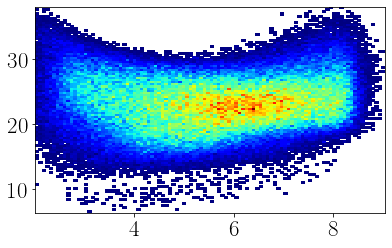

In [69]:
plt.hist2d(dvcsSimOutbCD.Ge, dvcsSimOutbCD.coneAngle, bins = 100, cmin = 1, cmap = cmap)
plt.show()

In [70]:
def lstsq_polyfit(args, x, y):
    x = np.array(x)
    return np.poly1d(args)(x) - y

[  0.83039139 -10.42649483  66.70842112]
[-6.45884123e-04  3.52281141e-01  8.31576922e+00]


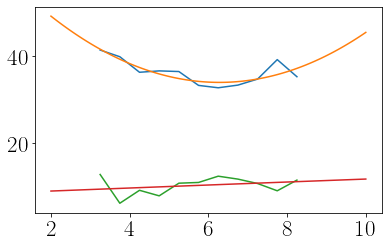

In [124]:
plt.plot((GeEdges[1:]+GeEdges[:-1])/2, ubs)
res_lsq = least_squares(lstsq_polyfit, [0, 0, 0], args=((GeEdges[1:]+GeEdges[:-1])/2, ubs))
plt.plot(np.linspace(2, 10, 101), np.poly1d([0.830, -10.426, 66.708])(np.linspace(2, 10, 101)))
print(res_lsq.x)
plt.plot((GeEdges[1:]+GeEdges[:-1])/2, lbs)
res_lsq = least_squares(lstsq_polyfit, [0, 0, 0], args=((GeEdges[1:]+GeEdges[:-1])/2, lbs))
plt.plot(np.linspace(2, 10, 101), np.poly1d([-0.000646, 0.352, 8.316])(np.linspace(2, 10, 101)))
print(res_lsq.x)


In [49]:
dvcsSimOutbCD = dvcsSimOutbCD.loc[(dvcsSimOutbCD.coneAngle<np.poly1d([0.830, -10.426, 66.708])(dvcsSimOutbCD.Gp))&(dvcsSimOutbCD.coneAngle>np.poly1d([-0.000646, 0.352, 8.316])(dvcsSimOutbCD.Gp))]
bkgSimOutbCD = bkgSimOutbCD.loc[(bkgSimOutbCD.coneAngle<np.poly1d([0.830, -10.426, 66.708])(bkgSimOutbCD.Gp))&(bkgSimOutbCD.coneAngle>np.poly1d([-0.000646, 0.352, 8.316])(bkgSimOutbCD.Gp))]

In [50]:
len(dvcsSimOutbCD)

1147654

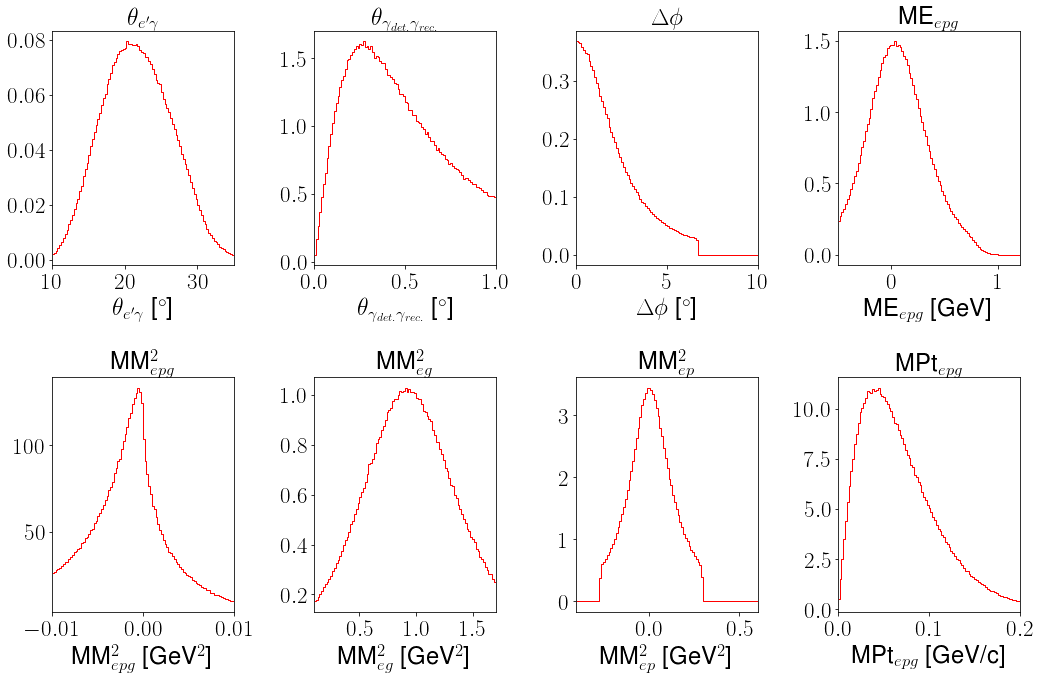

<Figure size 432x288 with 0 Axes>

In [51]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [35, 1, 10, 1.2, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvcs, bins = np.histogram(dvcsSimOutbCD[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

In [52]:
pvalue_opt = -0.1
for i in range(0, 10):
    if i == 0:
        simDist_dvcs, bins = np.histogram(dvcsSimOutbCD.MPt, bins = np.linspace(0.005, 0.08, 21))
        simDist_dvpi0, bins = np.histogram(bkgSimOutbCD.MPt, bins = np.linspace(0.005, 0.08, 21))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contOutbCD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contOutbCD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contOutbCD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contOutbCD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
        params =[1, 0.01, 0.05, 0, 0, 0]
    else:
        simDist_dvcs, bins = np.histogram(dvcsSimOutbCD.MPt, bins = np.linspace(lb, ub, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimOutbCD.MPt, bins = np.linspace(lb, ub, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contOutbCD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contOutbCD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contOutbCD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contOutbCD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    res_lsq = least_squares(lstsq_normfit, params, args=(bincenters, simDist))
    params = res_lsq.x
    Amp, loc, scale, a, b, c = params
    lb = 0.005#min(halfnorm.ppf(0, a=a, loc = loc, scale = scale), -0.003)
    ub = max(norm.ppf(0.9, loc = loc, scale = scale), 0.08)
    pvalue, chi2fit, dof = probFit(simDist, bins,  normfit(res_lsq.x, bincenters), res_lsq, hist = simDist, unchist = uncDist)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = 0#halfnorm.ppf(0, a=a, loc = loc, scale = scale)
        ub_opt = loc+4*scale#norm.ppf(1-0.0013, loc = loc, scale = scale)
        dist_opt = simDist
        unc_opt = uncDist
        print(params_opt, lb, ub, pvalue)

0.029034484558330687 25.60610767014122 14
[ 2.32798155e+00  1.35811191e-02  3.89385885e-02 -2.30103064e+01
  6.36799488e+02 -3.33703135e+03] 0.005 0.08 0.029034484558330687
0.15690010282566325 107.77229483880508 94
[ 7.38168110e-01  1.93999711e-02  2.79686199e-02 -8.62844557e+00
  5.87932587e+02 -4.27849798e+03] 0.005 0.08 0.15690010282566325
0.15690033730632136 107.77228017607804 94
[ 7.38164452e-01  1.93999971e-02  2.79685780e-02 -8.62840406e+00
  5.87932368e+02 -4.27850048e+03] 0.005 0.08 0.15690033730632136
0.1569004200353563 107.77227500280539 94
[ 7.38163889e-01  1.94000029e-02  2.79685714e-02 -8.62839713e+00
  5.87932297e+02 -4.27850049e+03] 0.005 0.08 0.1569004200353563
0.1569004200353563 107.77227500280539 94
0.1569004200353563 107.77227500280539 94
0.1569004200353563 107.77227500280539 94
0.1569004200353563 107.77227500280539 94
0.1569004200353563 107.77227500280539 94
0.1569004200353563 107.77227500280539 94


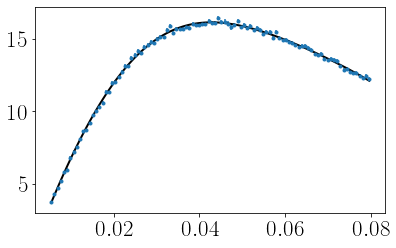

In [53]:
plt.errorbar(bincenters_opt, dist_opt, yerr = unc_opt, linestyle = '', marker = '.')
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.show()

In [54]:
params_opt

array([ 7.38163889e-01,  1.94000029e-02,  2.79685714e-02, -8.62839713e+00,
        5.87932297e+02, -4.27850049e+03])

In [55]:
print(ub_opt)

0.13127428868644977


In [56]:
dvcsSimOutbCD = dvcsSimOutbCD.loc[(dvcsSimOutbCD.MPt<0.131)]
bkgSimOutbCD = bkgSimOutbCD.loc[(bkgSimOutbCD.MPt<0.131)]

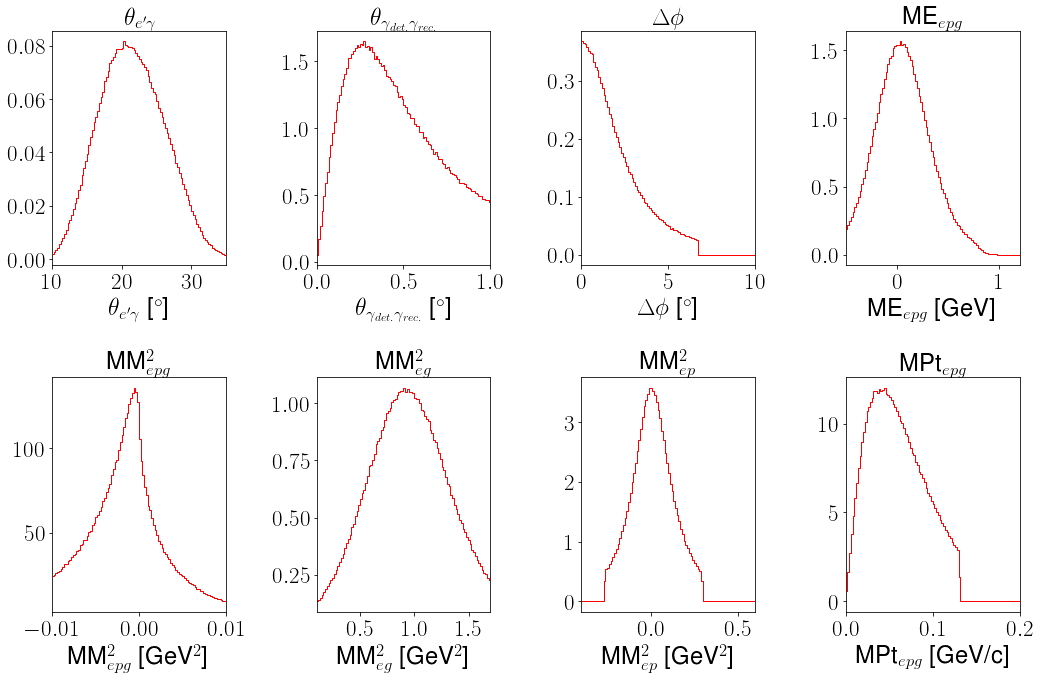

<Figure size 432x288 with 0 Axes>

In [57]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [35, 1, 10, 1.2, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvcs, bins = np.histogram(dvcsSimOutbCD[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

In [61]:
pvalue_opt = -0.1
for i in range(0, 1):
    if i == 0:
        simDist_dvcs, bins = np.histogram(dvcsSimOutbCD.reconGam, bins = np.linspace(0.005, 0.8, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimOutbCD.reconGam, bins = np.linspace(0.005, 0.8, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contOutbCD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contOutbCD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contOutbCD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contOutbCD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
        params =[1, 0.01, 0.3, 0, 0, 0]
    else:
        simDist_dvcs, bins = np.histogram(dvcsSimOutbCD.reconGam, bins = np.linspace(lb, ub, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimOutbCD.reconGam, bins = np.linspace(lb, ub, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contOutbCD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contOutbCD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contOutbCD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contOutbCD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    res_lsq = least_squares(lstsq_normfit, params, args=(bincenters, simDist))
    params = res_lsq.x
    Amp, loc, scale, a, b, c = params
    lb = 0.005#min(halfnorm.ppf(0, a=a, loc = loc, scale = scale), -0.003)
    ub = max(norm.ppf(0.9, loc = loc, scale = scale), 0.6)
    pvalue, chi2fit, dof = probFit(simDist, bins,  normfit(res_lsq.x, bincenters), res_lsq, hist = simDist, unchist = uncDist)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = 0#halfnorm.ppf(0, a=a, loc = loc, scale = scale)
        ub_opt = loc+4*scale
#         print(ub_opt, loc + 4*scale)
        dist_opt = simDist
        unc_opt = uncDist
        print(params_opt, lb, ub, pvalue)

3.2534936966754913e-09 196.4351313191287 94
[ 1.57707363  0.10767218  0.26016883 -2.25681919  8.96883529 -6.44630862] 0.005 0.6 3.2534936966754913e-09


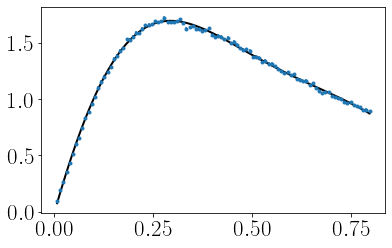

In [62]:
plt.errorbar(bincenters_opt, dist_opt, yerr = unc_opt, linestyle = '', marker = '.')
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.show()

In [63]:
print(ub_opt)

1.1483474894820922


In [64]:
dvcsSimOutbCD = dvcsSimOutbCD.loc[dvcsSimOutbCD.reconGam<1.148]
bkgSimOutbCD = bkgSimOutbCD.loc[bkgSimOutbCD.reconGam<1.148]

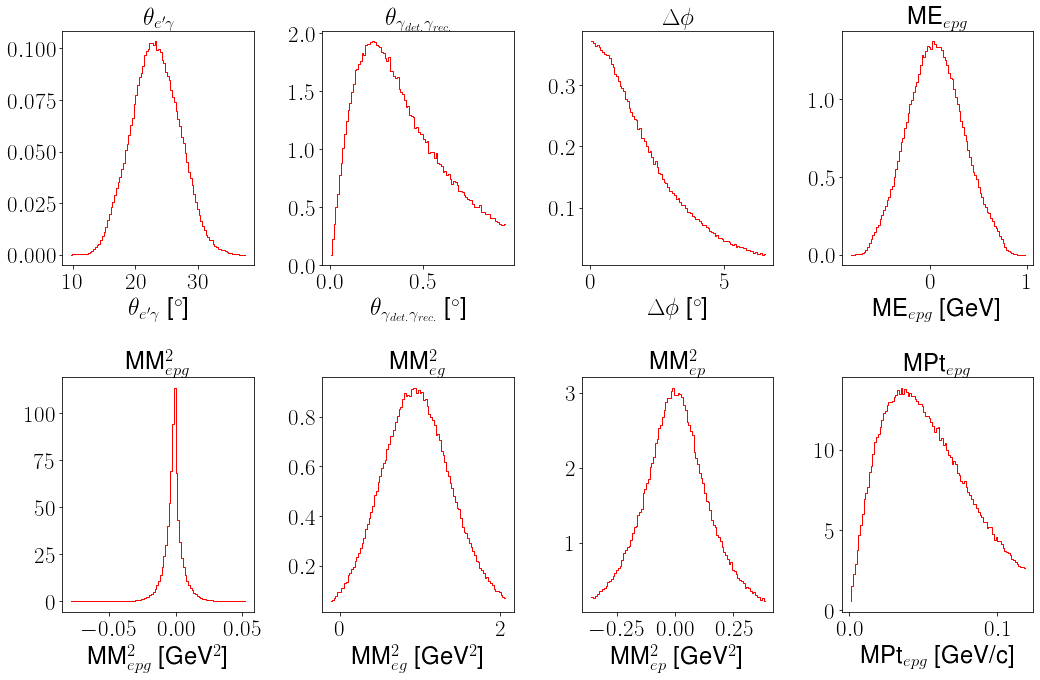

<Figure size 432x288 with 0 Axes>

In [138]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [35, 1, 10, 0.7, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = 100#np.linspace(start, end, 101)
        simDist_dvcs, bins = np.histogram(dvcsSimOutbCD[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
#         axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

In [92]:
len(dvcsSimOutbCD)

135031

In [65]:
print(dvcsSimOutbCD.MM2_epg.mean()+4*dvcsSimOutbCD.MM2_epg.std(), dvcsSimOutbCD.MM2_epg.mean()-4*dvcsSimOutbCD.MM2_epg.std())

0.024315325569070508 -0.027316916049011538
